# Handling Outliers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data 

In [48]:
df = pd.read_csv('D:/Btech_CS/Python/Feature_Engineering/house-prices-advanced-regression-techniques/train.csv')


In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# With the help of box plot

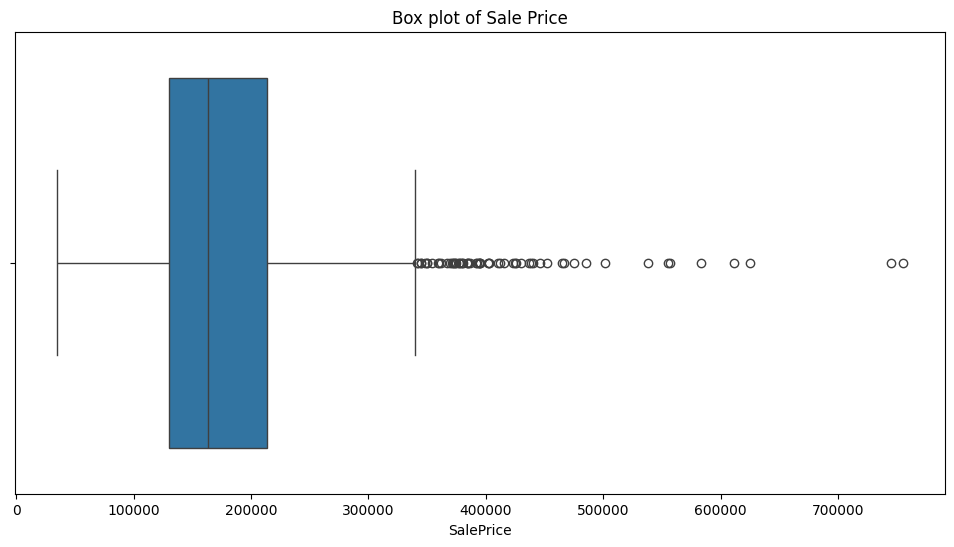

In [52]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box plot of Sale Price')
plt.show()

# By IQR method

In [68]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    higher = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > higher)]
    return lower, higher, outliers[[col]]

    # IF COLUMN HAS 20% OF OUTLIERS THEN PRINT THE NAME OF THE COLUMN

In [69]:
lower, higher, outliers_saleprice = detect_outliers_iqr(df, "SalePrice")

len(outliers_saleprice)
print(outliers_saleprice.min())
print(outliers_saleprice.max())

SalePrice    341000
dtype: int64
SalePrice    755000
dtype: int64


# With the help of z-score 

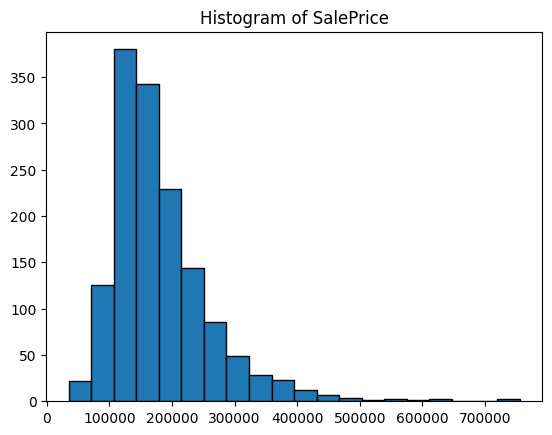

In [70]:
plt.hist(df['SalePrice'], bins=20, edgecolor='black')
plt.title("Histogram of SalePrice")
plt.show()

## First we need to check if the data is normally distributed 

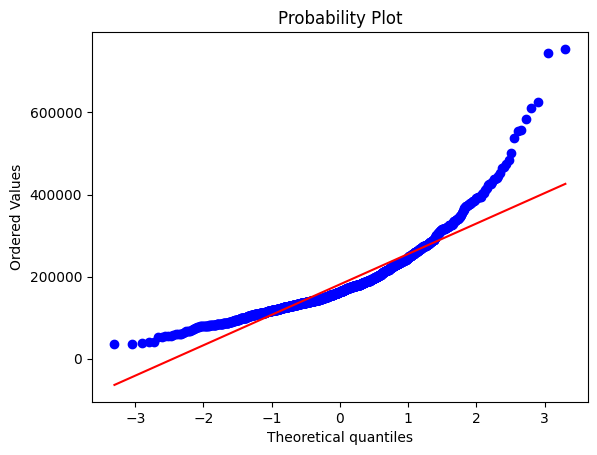

In [71]:
import scipy.stats as stats

stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.show()

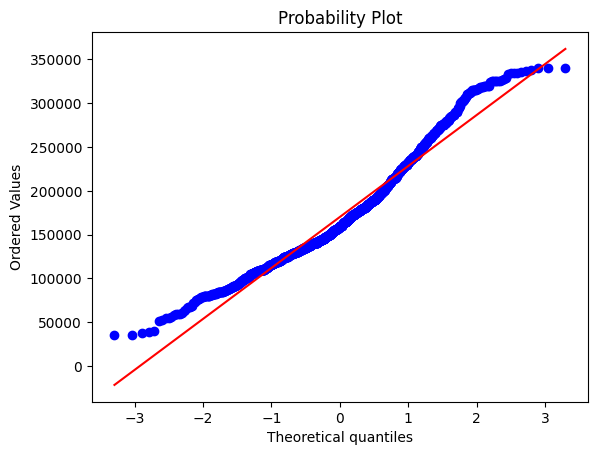

In [74]:
# After removing outliers

df_temp = df.copy()
df_final = df_temp[(df_temp['SalePrice'] >lower) & (df_temp['SalePrice'] < higher)]

stats.probplot(df_final['SalePrice'], dist="norm", plot=plt)
plt.show()

## how many SD away a value is
### 68% (1)
### 95% (2)
### 99% (two tailed) : 2.58
### 99.7% (two tailed) : 3
### |z| > 3


In [76]:
from scipy.stats import zscore

df["SalePrice_zscore"] = zscore(df["SalePrice"])
outliers_z = df[df["SalePrice_zscore"].abs() > 2]

len(outliers_z)

63

# With the help of Winsorization (Capping extreme values)
### fold = 0.05 (two-tail)
### Anything below the 5th percentile becomes --> 5th percentile value
### Anything above the 95th percentile becomes --> 95th percentile value

In [83]:
from feature_engine.outliers import Winsorizer
col_name = "LotArea"
winsor = Winsorizer(capping_method="quantiles", tail="both", fold=0.05, variables=[col_name])
df_winsor = winsor.fit_transform(df)

In [84]:
percentile_5 = df[col_name].quantile(0.05)
percentile_95 = df[col_name].quantile(0.95)

print(f"5th percentile of {col_name} : {percentile_5}")
print(f"95th percentile of {col_name} : {percentile_95}")

5th percentile of LotArea : 3311.7000000000003
95th percentile of LotArea : 17401.149999999998


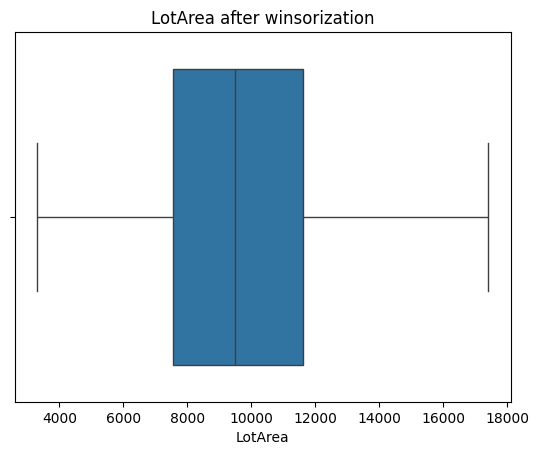

In [85]:
sns.boxplot(x=df_winsor[col_name])
plt.title(f"{col_name} after winsorization")
plt.show()

In [86]:
def comapre_plots(original_data, winsorized_data, col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(x=original_data[col])
    plt.title(f"Original {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=winsorized_data[col])
    plt.title(f"Winsorized {col}")
    
    plt.show()

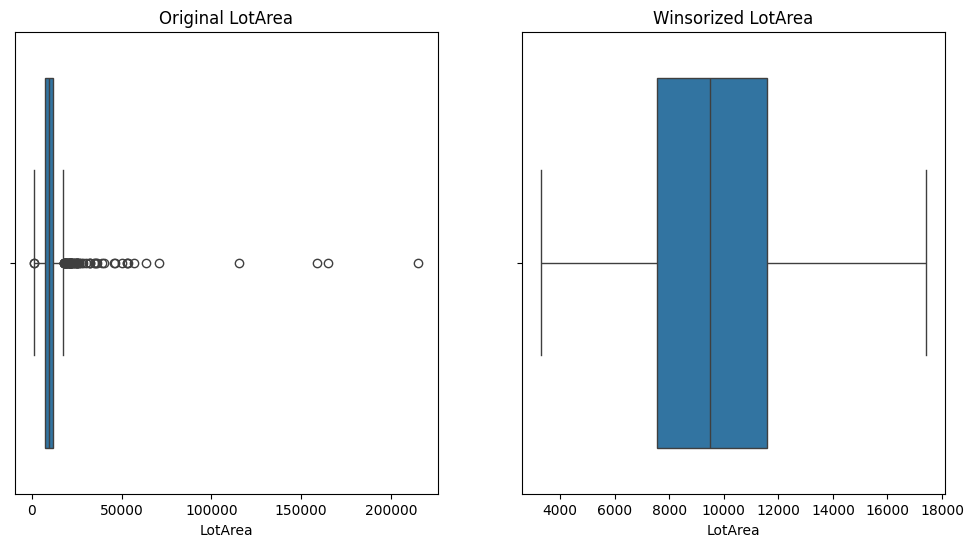

In [87]:
comapre_plots(df, df_winsor, col_name)